### Train model using PCA components

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [3]:
columns_list_file='bike_train_column_list_pca_cloud.txt'
train_file = 'bike_train_pca_cloud.csv'
validation_file = 'bike_validation_pca_cloud.csv'
test_file = 'bike_test_pca_cloud.csv'

In [4]:
columns = ''
with open('bike_train_column_list_pca_cloud.txt','r') as f:
    columns = f.read().split(',')

In [5]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour',
 'component_0',
 'component_1']

In [6]:
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file, names=columns)

In [7]:
df_train.head(2)

,count,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1
0,4.477337,3,0,0,2,2011,9,3,5,0,-0.015712,-0.993329
1,5.517453,3,0,1,1,2012,8,13,0,14,0.421141,-0.882900


In [8]:
df_validation.head(2)

,count,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1
0,6.095825,3,0,1,2,2011,7,7,3,8,0.009106,-0.998114
1,5.961005,2,0,0,1,2011,6,11,5,13,0.232854,-0.967271


In [9]:
df_train.iloc[:,1:].head(2)

,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1
0,3,0,0,2,2011,9,3,5,0,-0.015712,-0.993329
1,3,0,1,1,2012,8,13,0,14,0.421141,-0.882900


In [10]:
df_train.iloc[:,1:-2].head(2)

,season,holiday,workingday,weather,year,month,day,dayofweek,hour
0,3,0,0,2,2011,9,3,5,0
1,3,0,1,1,2012,8,13,0,14


In [11]:
X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0].ravel()

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [13]:
X_train.head(2)

,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1
0,3,0,0,2,2011,9,3,5,0,-0.015712,-0.993329
1,3,0,1,1,2012,8,13,0,14,0.421141,-0.882900


In [14]:
y_train

array([4.47733681, 5.5174529 , 5.81413053, ..., 5.83773045, 4.60517019,
       6.67329797])

In [82]:
# XGBoost training parameters
regressor = xgb.XGBRegressor(max_depth=5, eta=0.1, subsample=0.7, n_estimators=199)

In [83]:
regressor

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=199, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [84]:
regressor.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_validation,y_validation)])

[0]	validation_0-rmse:3.90520	validation_1-rmse:3.91421
[1]	validation_0-rmse:3.52677	validation_1-rmse:3.53340
[2]	validation_0-rmse:3.18628	validation_1-rmse:3.19184
[3]	validation_0-rmse:2.87943	validation_1-rmse:2.88411
[4]	validation_0-rmse:2.60366	validation_1-rmse:2.60716
[5]	validation_0-rmse:2.35786	validation_1-rmse:2.36080
[6]	validation_0-rmse:2.13735	validation_1-rmse:2.13997
[7]	validation_0-rmse:1.93908	validation_1-rmse:1.94093
[8]	validation_0-rmse:1.76130	validation_1-rmse:1.76303
[9]	validation_0-rmse:1.60076	validation_1-rmse:1.60234
[10]	validation_0-rmse:1.45617	validation_1-rmse:1.45722
[11]	validation_0-rmse:1.32774	validation_1-rmse:1.32804
[12]	validation_0-rmse:1.21347	validation_1-rmse:1.21357
[13]	validation_0-rmse:1.10587	validation_1-rmse:1.10727
[14]	validation_0-rmse:1.01615	validation_1-rmse:1.01850
[15]	validation_0-rmse:0.93525	validation_1-rmse:0.93856
[16]	validation_0-rmse:0.86421	validation_1-rmse:0.86854
[17]	validation_0-rmse:0.79905	validation

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.100000001, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=199, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)

In [85]:
result = regressor.evals_result()

In [86]:
training_rounds = range(len(result['validation_0']['rmse']))

In [87]:
training_rounds

range(0, 199)

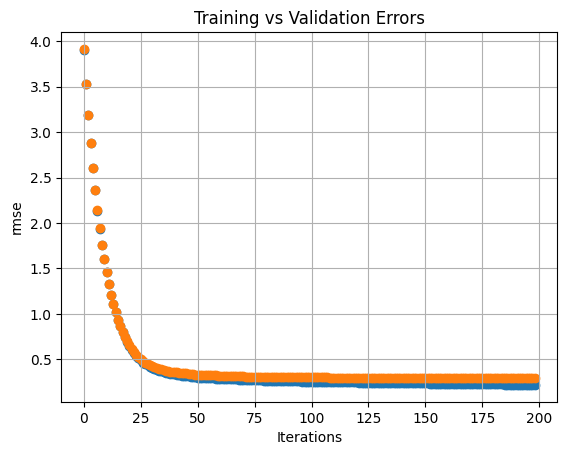

In [88]:
plt.scatter(x=training_rounds, y=result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds, y=result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('rmse')
plt.title('Training vs Validation Errors')
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

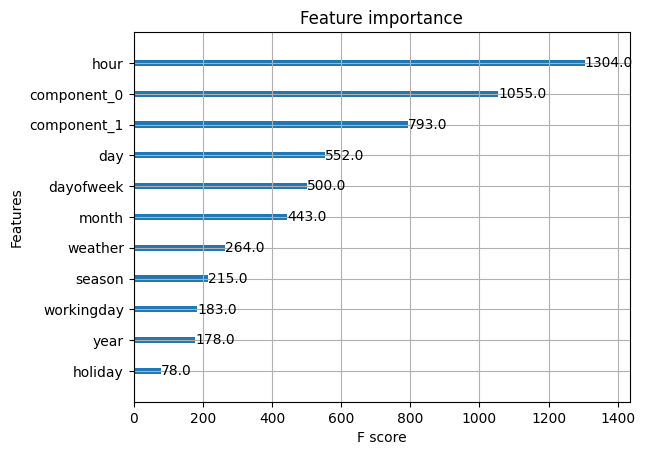

In [89]:
xgb.plot_importance(regressor)

In [90]:
# Prepare test data to submit to kaggle
df_test = pd.read_csv(test_file,parse_dates=['datetime'])

In [91]:
df_test.head(2)

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1
0,2011-01-20 00:00:00,1,0,1,1,2011,1,20,3,0,-0.102386,-0.955772
1,2011-01-20 01:00:00,1,0,1,1,2011,1,20,3,1,-0.232725,-0.964794


In [92]:
X_test = df_test.iloc[:,1:]

In [93]:
X_test.head(2)

,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1
0,1,0,1,1,2011,1,20,3,0,-0.102386,-0.955772
1,1,0,1,1,2011,1,20,3,1,-0.232725,-0.964794


In [94]:
result = regressor.predict(X_test)

In [95]:
result[:5]

array([2.5775442, 1.7818122, 1.3568536, 1.0983771, 1.0132679],
      dtype=float32)

In [96]:
np.expm1(result)

array([ 12.164768 ,   4.940612 ,   2.8839536, ..., 162.84421  ,
       114.99463  ,  58.7613   ], dtype=float32)

In [97]:
df_test['count']=np.expm1(result)

In [98]:
df_test.head(2)

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,count
0,2011-01-20 00:00:00,1,0,1,1,2011,1,20,3,0,-0.102386,-0.955772,12.164768
1,2011-01-20 01:00:00,1,0,1,1,2011,1,20,3,1,-0.232725,-0.964794,4.940612


In [99]:
df_test[df_test['count']<0]

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,count


In [100]:
def adjust_count(x):
    if x<0:
        return 0
    else:
        return x

In [101]:
df_test['count'].map(adjust_count)

0        12.164768
1         4.940612
2         2.883954
3         1.999295
4         1.754588
           ...    
6488    318.097046
6489    209.975952
6490    162.844208
6491    114.994629
6492     58.761299
Name: count, Length: 6493, dtype: float64

In [102]:
df_test['count'] = df_test['count'].map(adjust_count)

In [81]:
df_test.head(2)

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,count
0,2011-01-20 00:00:00,1,0,1,1,2011,1,20,3,0,-0.102386,-0.955772,11.519268
1,2011-01-20 01:00:00,1,0,1,1,2011,1,20,3,1,-0.232725,-0.964794,4.443256


In [103]:
df_test[['datetime','count']].to_csv('normalized_cloud_pca_predicted_count_in_localmode_199.csv',index=False)